In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,classification_report

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values


In [5]:
LE = LabelEncoder()

In [6]:
X[:,0] = LE.fit_transform(X[:,0])

In [7]:
CT = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[4])],remainder='passthrough')

In [8]:
X = CT.fit_transform(X)

In [9]:
X[:5,:]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 80.0, 0, 1, 25.19, 6.6, 140],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 54.0, 0, 0, 27.32, 6.6, 80],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 28.0, 0, 0, 27.32, 5.7, 158],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0, 36.0, 0, 0, 23.45, 5.0, 155],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1, 76.0, 1, 1, 20.14, 4.8, 155]],
      dtype=object)

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [11]:
KNN3 = KNeighborsClassifier(n_neighbors=3)

In [12]:
KNN3.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [13]:
Ypred3= KNN3.predict(Xtest)

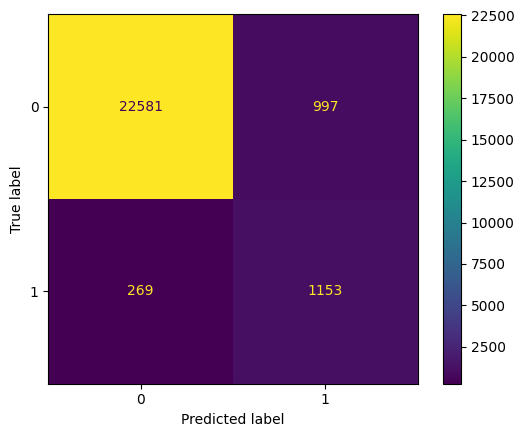

In [14]:
ConfusionMatrixDisplay.from_predictions(Ypred3,Ytest)

In [15]:
print(f'f1_score: {f1_score(Ypred3,Ytest)}')
print(f'{classification_report(Ypred3,Ytest)}')

f1_score: 0.6455767077267637
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     23578
           1       0.54      0.81      0.65      1422

    accuracy                           0.95     25000
   macro avg       0.76      0.88      0.81     25000
weighted avg       0.96      0.95      0.95     25000



In [16]:
KNN5 = KNeighborsClassifier(n_neighbors=5)

In [17]:
KNN5.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [18]:
Ypred5= KNN5.predict(Xtest)

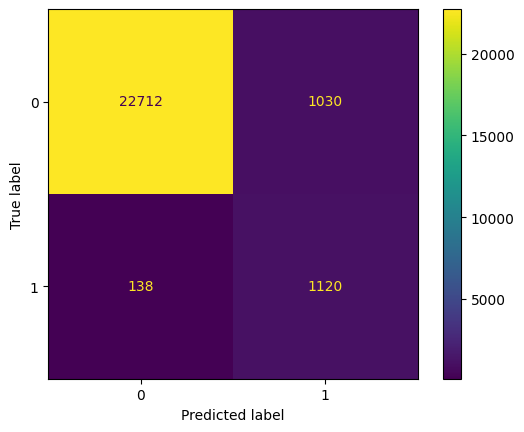

In [19]:
ConfusionMatrixDisplay.from_predictions(Ypred5,Ytest)

In [20]:
print(f'f1_score: {f1_score(Ypred5,Ytest)}')
print(f'{classification_report(Ypred5,Ytest)}')

f1_score: 0.6572769953051644
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     23742
           1       0.52      0.89      0.66      1258

    accuracy                           0.95     25000
   macro avg       0.76      0.92      0.82     25000
weighted avg       0.97      0.95      0.96     25000



In [21]:
KNN7 = KNeighborsClassifier(n_neighbors=7)

In [22]:
KNN7.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=7)

In [23]:
Ypred7= KNN7.predict(Xtest)

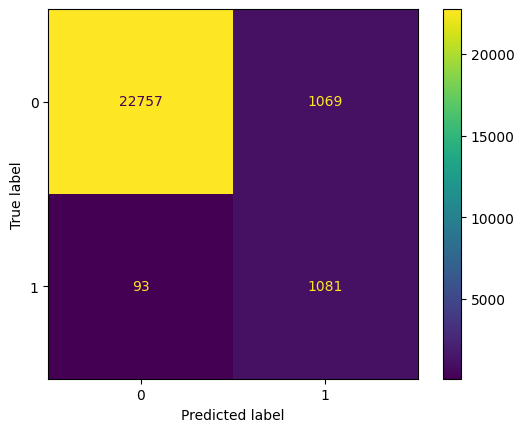

In [24]:
ConfusionMatrixDisplay.from_predictions(Ypred7,Ytest)

In [25]:
print(f'f1_score: {f1_score(Ypred7,Ytest)}')
print(f'{classification_report(Ypred7,Ytest)}')

f1_score: 0.6504211793020457
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     23826
           1       0.50      0.92      0.65      1174

    accuracy                           0.95     25000
   macro avg       0.75      0.94      0.81     25000
weighted avg       0.97      0.95      0.96     25000



### Applied the KNN classifier with values of K = 3,5,7 on the diabeties dataset. For each case, we computed the confusion matrix and F1_score. We observed that smaller k(e.g., K = 3) gave high sensitivity but was more affected by noise, while larger K(e.g., K = 7) reduced overfitting but sometimes misclassified minority cases. the model with K = 5 provided the best balance, giving the highest F1_score and a more stable Confusion matrix. Therefore, we recommend using K = 5 as the optimal parameter for predicting whether a patient is diabetic, since it achieves a good trade-off between precision and recall.